In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
attach(housing_df)

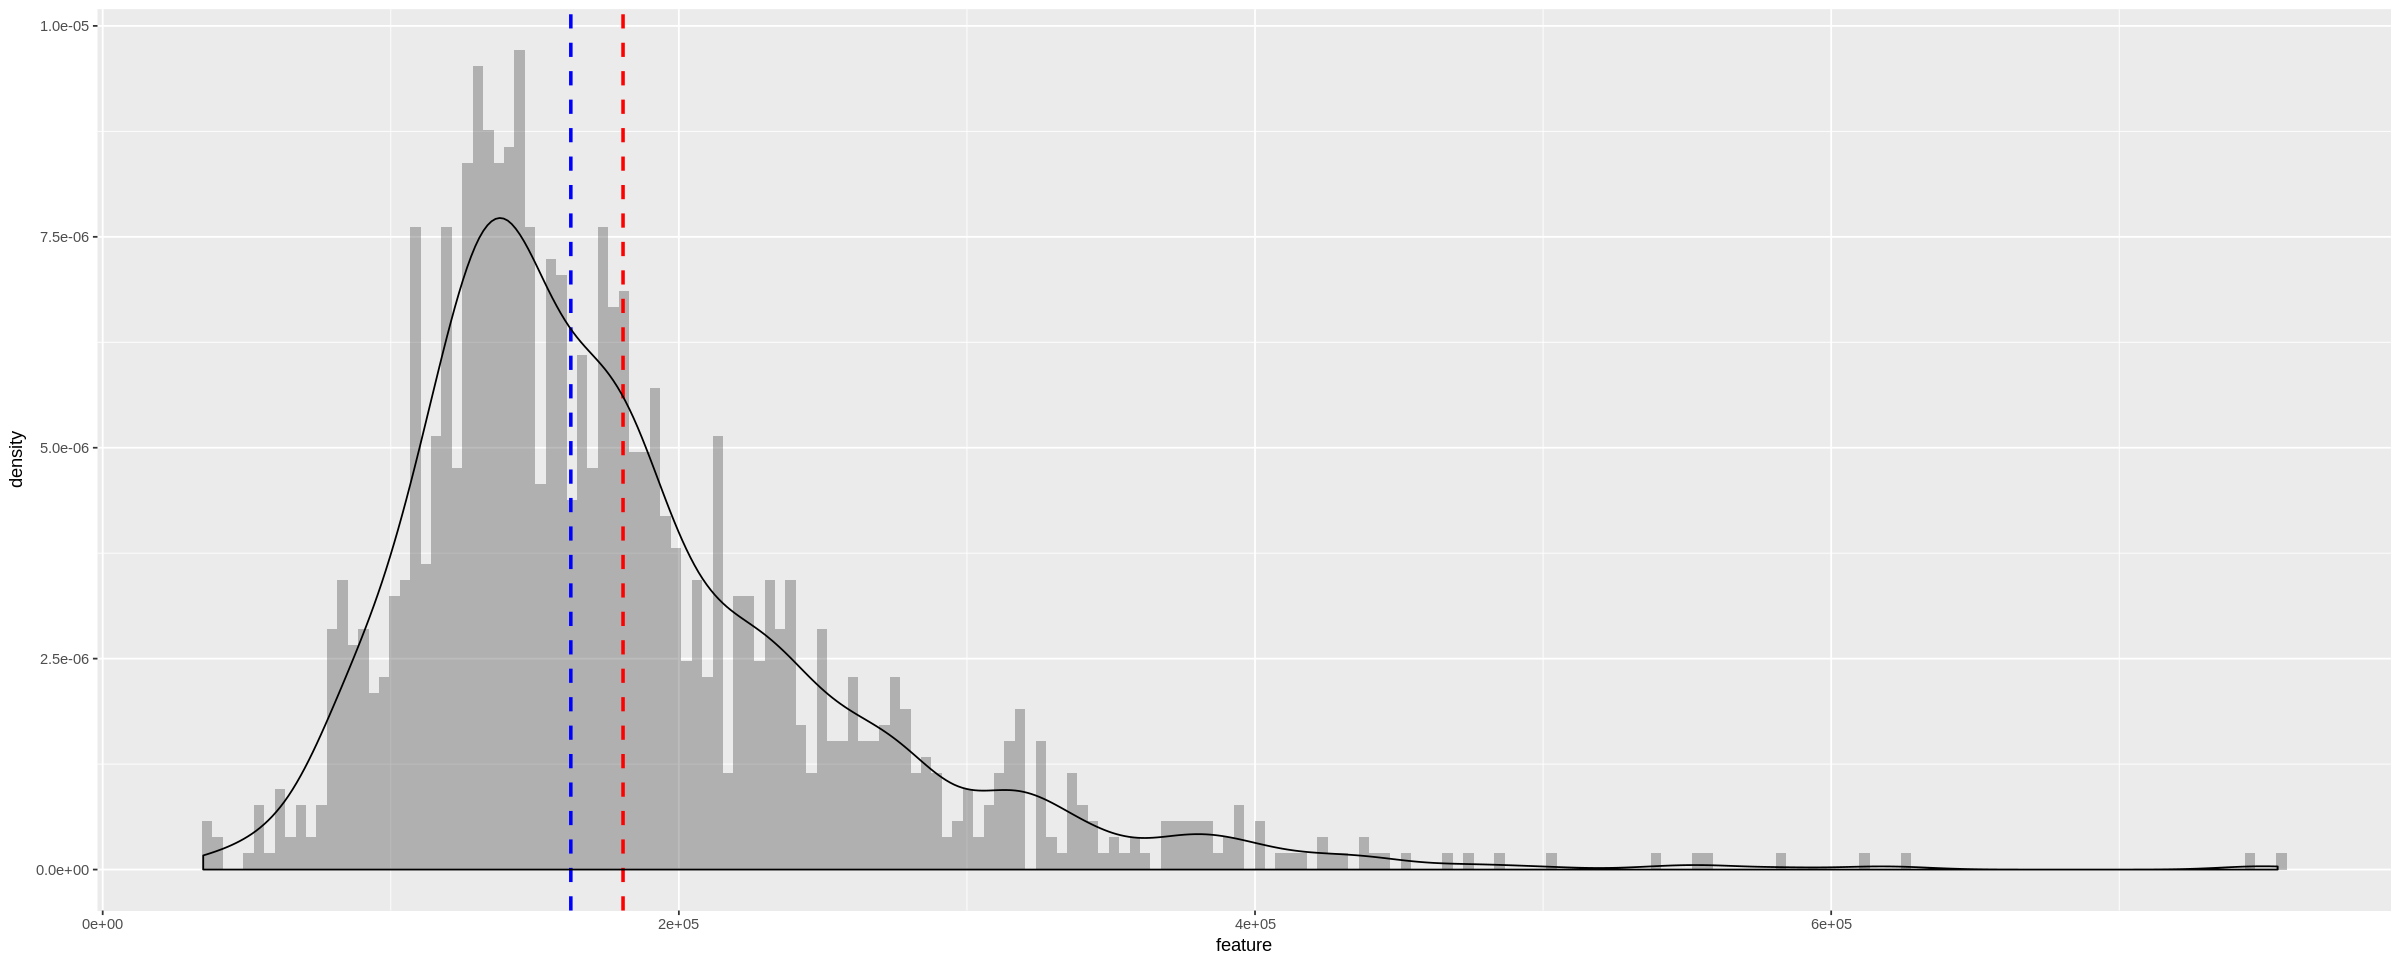

In [3]:
hist_with_kde(SalePrice)

## Testing and Estimation

Let $M$ denote the median hours price at which homes sell in Ames, Iowa. Let us test the hypothesis that median price is \$150000. 

Let $p$ denote the proporation of housees that sold for at least $150000. 

If the median sale price is \$150000, then the proportion $p=0.5$. We can restate this as the hypothesis

$$H: p=0.5$$


In [4]:
greater_than_150k = ifelse(SalePrice >= 150000, "yes", "no")

In [5]:
table(greater_than_150k)

greater_than_150k
 no yes 
615 836 

More than 836 houses sold for more than \$150000. 

## Proportion Tests

If $H$ is true, then the number of yes's has a binomial $(n=1451, p=0.5)$ distribution with mean $np$ and variance $np(1-p)$. In addition, if $n$ is large, then the number of yes's is approximately normal. 

<img src=https://www.evernote.com/l/AAE6VhzJPI5FYYXzXeiAAgaFMQeir-3Y_0IB/image.png width=400px>

The traditional test for a proportion is based on the assumption that, when the population proportion is $p = 0.5$, the number of yes’s $y$ in a sample of $n$ is
approximately normally distributed with mean $n/2$ and standard deviation $\sqrt{n/4}$. 

The $Z$ statistic

$$Z = \frac{y-\mu}{\sigma} = \frac{y-np}{\sqrt{np(1-p)}}$$

is approximately standard normal.

One computes the statistic $z_{obs}$ from the sample and one decides whether to accept or reject $H$ by computing the lower tail probability $P(Z \leq z_{obs})$. If the alternative hypothesis is that $p < 0.5$, the p-value is equal to the lower tail probability; if the alternative is two-sided where $p\neq 0.5$, the p-value is double the lower-tail probability.

This traditional $Z$ test is implemented using the `prop.test` function. We define `y` to be the number of observed `yes` responses in our sample. We define `n` to be the sample size. We indicate by the `p=0.5` that we are testing the hypothesis that the proportion is equal to 0.5 and by `alternative = "two.sided"` that the true proportion may lie in either direction.

In [6]:
((836-1451*0.5)/sqrt(1451*0.5*0.5))

[1] 5.801744

In [7]:
y <- 836; n <- 1451
Test <- prop.test(y, n, p=0.5, 
                  alternative = "two.sided")

In [8]:
Test


	1-sample proportions test with continuity correction

data:  y out of n, null probability 0.5
X-squared = 33.356, df = 1, p-value = 7.673e-09
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.5502131 0.6016880
sample estimates:
        p 
0.5761544 


In [9]:
names(Test)

[1] "statistic"   "parameter"   "p.value"     "estimate"    "null.value" 
[6] "conf.int"    "alternative" "method"      "data.name"

In [10]:
Test$estimate

p 
0.5761544